1) Download pdf from this link: https://huntfish.mdc.mo.gov/sites/default/files/downloads/page/IntroToFishing_2017_v2.pdf 

In [1]:
import PyPDF2

with open('fishing.pdf','rb') as pdf_file, open('fishing.txt', 'w', encoding='utf-8') as text_file:
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    for page_number in range(number_of_pages):
        page = read_pdf.getPage(page_number)
        page_content = page.extractText()
        text_file.write(page_content)

2) Text Visualization without mask for this text (using WordCloud)(Black and White) 

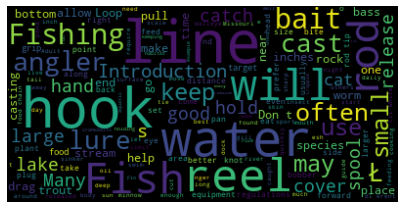

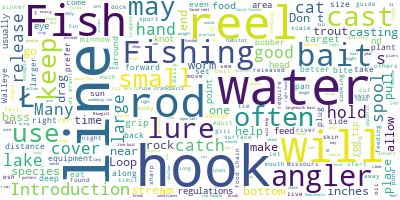

In [5]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot
import matplotlib.pyplot as plt

text = open('./fishing.txt', encoding='utf-8').read()
stopwords = set(STOPWORDS)
stopwords.update(['sh','shing'])
wordcloud = WordCloud(stopwords=stopwords,max_words=300,max_font_size=60, background_color='black',).generate(text)


plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


wordcloud = WordCloud(stopwords=stopwords,max_words=500,max_font_size=60, background_color='white').generate(text)
from IPython.display import Image
pil_img = wordcloud.to_image()
display(pil_img)


3) Text Visualization with a mask (you can choose your prefered mask)

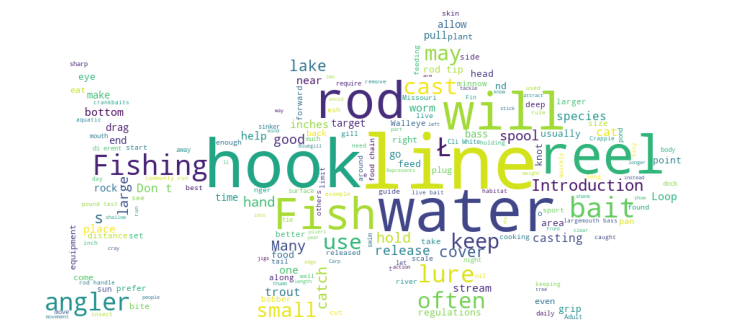

In [4]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import requests

mask = np.array(Image.open(requests.get('https://cdn2.lamag.com/wp-content/uploads/sites/6/2019/11/Tuna-Illustration-1000x437.jpg', stream=True).raw))

word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=stopwords, mask=mask).generate(text)
plt.figure(figsize=(10,8),facecolor = 'white')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
    